In [103]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random

In [104]:
def model(x, time, parameters):
  A, B, u = parameters
  dxdt = np.matmul(A,x.reshape(-1, 1))+ np.matmul(B, np.array(u).reshape(-1, 1))
  return dxdt.ravel()

In [121]:
col_names = []
nofpoints = 20;
for i in range(nofpoints):
  col_names.append('y_' + str(i))

col_names += ['a1', 'a2', 'b1', 'b2', 'u']
table = pd.DataFrame(columns=col_names)

for i in range(300):
    a1 = random.uniform(5)
    a2 = random.uniform(5)
    b1 = random.uniform(5)
    b2 = random.uniform(5)
    A = np.array([[0, 1], [-a1, -a2]])
    B = np.array([[b1],[b2]])
    C = np.array([1, 0])
    u = random.uniform(50)
    parameters = (A, B, u)
    t = np.linspace(0, 10, nofpoints)
    state0 = np.array([0, 0])
    result = odeint(model, state0, t, args=(parameters,))
    y = np.zeros(result.shape[0])
    for i in range(result.shape[0]):
        #x = np.transpose(result[i][:])
        x = (result[:][i])
        y[i] = np.matmul(C, x)
        target = np.array([a1, a2, b1, b2, u])
    y = np.append(y, target)
    table.loc[len(table)]= y


table.to_csv('dataset_model.csv')

table.head()

,y_0,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,...,y_15,y_16,y_17,y_18,y_19,a1,a2,b1,b2,u
0,0.0,103.470474,169.841497,202.634886,217.431860,223.846126,226.572989,227.720839,228.201543,228.402313,...,228.545105,228.545542,228.545724,228.545800,228.545832,4.768043,4.528949,4.114231,4.197650,47.730118
1,0.0,47.284430,89.774170,113.979345,122.004075,120.914403,116.870131,113.302064,111.296707,110.649611,...,111.610162,111.580655,111.555527,111.541783,111.537599,2.332872,1.885917,2.314809,3.828850,31.755654
2,0.0,12.003113,22.219190,29.660820,34.898547,38.553882,41.099383,42.871039,44.103927,44.961858,...,46.701930,46.769713,46.816880,46.849702,46.872541,2.255614,3.962950,2.019615,2.178595,10.395001
3,0.0,5.945856,13.330533,19.974172,25.229365,29.101800,31.827782,33.685357,34.920257,35.725122,...,37.019445,37.047172,37.063602,37.073242,37.078841,1.005294,1.969880,1.180354,3.752236,6.134611
4,0.0,61.878596,110.339668,142.663314,163.015963,175.527032,183.136670,187.742940,190.525090,192.203788,...,194.631042,194.679661,194.708971,194.726642,194.737294,2.334700,3.389631,3.470272,1.687632,33.804580


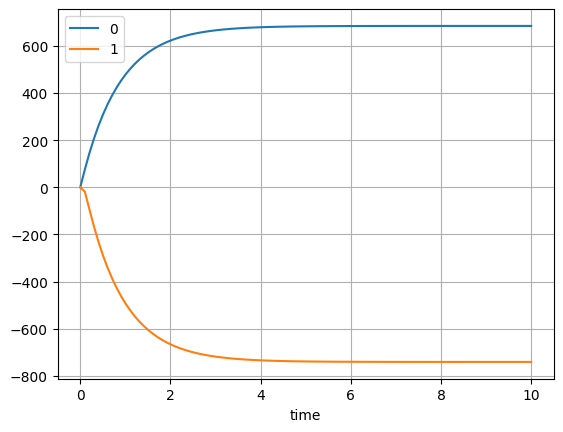

KeyError: '[25, 22, 57, 63] not found in axis'

In [100]:
plt.plot(t, result[:, 0], label='0')
plt.plot(t, result[:, 1], label='1')
plt.xlabel('time')
plt.grid()
plt.legend(loc='best')
plt.show()